# "Building the Perceptron Model: A Classroom Scenario"

### Introduction
The Perceptron is one of the simplest forms of a neural network, originally introduced in the late 1950s. It is a binary classification algorithm that forms the basis of machine learning. The Perceptron model is a more generalized form of the AND, OR and NOT models (logic gates in digital electronics), and it's capable of learning and solving binary classification problems that are linearly separable.

A linearly separable problem is one where an example set can be divided into positive and negative examples by a hyperplane. In simpler terms, if you can draw a straight line (in 2D space) or a plane (in 3D space) to separate different classes of data, the problem is linearly separable.

The Perceptron model takes several binary inputs, x1, x2, ..., xn, and produces a single binary output. In the context of a binary classification problem, the output can be thought of as the class label predicted by the model for a given input pattern.

" To make this concept more relatable, let's consider a classroom scenario. Suppose we have a group of students, and we want to predict whether a student will pass or fail based on the number of hours they study and their attendance. The Perceptron model is like a strict teacher who sets a clear boundary: if a student studies for a certain number of hours and maintains a certain level of attendance, they will pass; otherwise, they will fail. The 'pass' or 'fail' outcome is the binary output, while the study hours and attendance are the binary inputs. The task of the Perceptron model (or the teacher) is to find the best boundary (or criteria) that can separate the students who will pass from those who will fail. "






In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

It is a single-layer neural network that consists of four main parameters:

* Input values
* Weights
* Bias
*Activation function

The input values are the features of the data that the Perceptron is trying to classify. The weights are a set of values that are multiplied by the input values. The bias is a constant value that is added to the weighted sum of the input values. The activation function is a function that is used to map the weighted sum of the input values to a binary output value (0 or 1).

The Perceptron works by iteratively adjusting the weights and bias until it can correctly classify all of the data in its training set. To adjust the weights, the Perceptron looks at the error it makes in its predictions. If the Perceptron predicts that an input belongs to class A, but it actually belongs to class B, then the weights will be adjusted so that the Perceptron is more likely to predict class B for that input in the future.

The adjustment of the weights is based on the following equation:

w = w + (error * x)

![Perceptron](Perceptron_.png)

where:

* w is the weight that is being adjusted
* error is the error that the Perceptron made in its prediction
* x is the input value that caused the error
  
The Perceptron will continue to adjust the weights and bias until it can correctly classify all of the data in its training set. Once the Perceptron has converged, it can be used to classify new data.

The image block diagram of the Perceptron model. The input values are represented by the arrows entering the box. The weights are represented by the numbers next to each arrow. The bias is represented by the number in the box. The activation function is represented by the circle in the box. The output value is represented by the arrow exiting the box.

The Perceptron model is a simple algorithm, but it can be used to solve a variety of classification problems. It is a good starting point for learning about machine learning algorithms.




#### Let's think of our Perceptron as a student who is learning to classify things based on examples. 

1. **Initialization (`__init__` method)**: When a new student (Perceptron) arrives, they know nothing. We can represent this lack of knowledge as small random numbers, which we call `weights`. The `eta` is like the student's learning speed - some students learn quickly, some slowly. The `epochs` is like the number of times the student will review the entire textbook.

2. **Calculating the Outcome (`_z_outcome` and `activation_function` methods)**: The `_z_outcome` function is like the student looking at an object and making a raw guess based on what they've learned so far. The `activation_function` is like the student finalizing their guess - if their raw guess is positive, they guess it's a 1, otherwise, they guess it's a 0.

3. **Learning from Data (`fit` method)**: The `fit` method is like a study session. The student goes through all the examples in their textbook (`epochs` times), makes guesses for each one, checks if they're right, and updates their knowledge (`weights`) based on their mistakes. If they guessed too high, they'll adjust their knowledge to guess lower next time, and vice versa.

4. **Making Predictions (`predict` method)**: Once the student has finished studying, you can show them new animals and ask them to classify them. This is what the `predict` method does.

5. **Calculating the Total Loss (`total_loss` method)**: The `total_loss` method is like a score that tells how many mistakes the student made on their last review of the textbook. The lower the score, the better the student has learned.

6. **Saving and Loading the Model (`save` and `load` methods)**: Finally, the `save` and `load` methods are like saving the student's knowledge to a diary and reading it back. This way, the student doesn't have to relearn everything every time they need to classify animals.

In summary, a Perceptron is a simple but powerful algorithm that can learn to classify things based on examples. It's like a student who learns from a textbook, makes mistakes, and updates their knowledge based on those mistakes.


In [50]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        # Initialize the student's knowledge (weights) with small random numbers
        # We use a 3-dimensional vector because we have two inputs and one bias
        self.weights = np.random.randn(3) * 1e-4 
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        # Set the student's learning speed (eta) and the number of times they'll review the textbook (epochs)
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        # The student makes a raw guess based on their current knowledge and the object they're looking at
        # This is done by taking the dot product of the inputs and the weights
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        # The student finalizes their guess
        # If the raw guess (z) is greater than 0, they guess 1; otherwise, they guess 0
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        # The student starts a study session
        # X is the set of examples and y is the correct labels for those examples
        self.X = X
        self.y = y
        
        # Add a bias term to the inputs
        # This is like adding a constant term to a linear equation to allow it to fit the data better
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            # The student makes guesses for all the examples in the textbook
            # They do this by calculating the z outcome and then applying the activation function
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            # The student checks if their guesses are right and calculates their mistakes
            # The error is the difference between the correct labels and the guesses
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            # The student updates their knowledge based on their mistakes
            # They do this by adding the dot product of the inputs and the error to the weights
            # The learning rate (eta) controls the size of the update
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    def predict(self, X):
        # The student classifies new objects based on their updated knowledge
        # They do this in the same way as in the fit method, but without updating the weights
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        # Calculate the student's score based on their mistakes
        # The total loss is the sum of the absolute values of the errors
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        # Helper function to create a directory and return the path to a file in that directory
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        # Save the student's knowledge to a diary
        # The knowledge is saved as a binary file using the joblib library
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        # Read the student's knowledge from the diary
        # The knowledge is loaded from a binary file using the joblib library
        return joblib.load(filepath)


The `prepare_data` function is a simple utility function that prepares our data for training our Perceptron model. 

In machine learning, we usually divide our data into two parts: features and target. 

1. **Features (X)**: These are the characteristics or attributes based on which the model makes a prediction. For example, in a task to predict whether a student will pass or fail a course, features could be the number of hours the student studies, their attendance rate, their previous grades, etc.

2. **Target (y)**: This is what we want our model to predict. In the student example, the target would be whether each student passes or fails.

In our function, we take a DataFrame `df` and a target column name `target_col` as input. 

The function does two things:

1. It separates the features and the target from the DataFrame. This is done using the `drop` method to remove the target column from the DataFrame, leaving us with just the features (X). The target column itself becomes our target (y). In our student example, the features might be columns like 'study_hours', 'attendance_rate', and 'previous_grades', and the target would be the 'pass_or_fail' column.

2. It returns the features and the target as a tuple. This is a common way to handle data in machine learning because it allows us to easily split our data into a training set and a test set later on. In our student example, this would allow us to use some students' data to train our model, and then test the model's predictions on other students' data.


In [51]:
def prepare_data(df, target_col="y"):
    # Drop the target column from the DataFrame to get the features
    X = df.drop(target_col, axis=1)
    
    # The target column itself is our target
    y = df[target_col]
    
    # Return the features and the target
    return X, y 

In this part of the code, we are training our Perceptron model to learn the relationship between a student's study habits and their pass/fail outcome. 

Here's what each part of the code does:

1. **Creating the student data**: We first create a dictionary that represents our hypothetical student data. The keys 'x1' and 'x2' could represent the number of hours a student studies and their attendance rate, respectively, and 'y' represents whether they pass (1) or fail (0). We then convert this dictionary into a DataFrame for easier manipulation.

2. **Preparing the data**: We use the `prepare_data` function we defined earlier to separate the features (X) and the target (y) from our DataFrame.

3. **Setting the learning parameters**: We set the learning rate (`ETA`) and the number of epochs (`EPOCHS`). The learning rate is how much the model changes its weights in response to the error it made. The number of epochs is how many times the model will go through the entire dataset.

4. **Creating and training the model**: We create a new Perceptron model with our learning parameters and train it on our data using the `fit` method. This is like the model studying the student data and learning the relationship between study habits and pass/fail outcomes.

5. **Calculating the total loss**: After training, we calculate the total loss of the model using the `total_loss` method. This gives us a measure of how well our model has learned from the student data. A lower total loss means the model's predictions are closer to the actual outcomes, while a higher total loss means the model's predictions are further from the actual outcomes.


In [52]:
# Create the AND truth table as a dictionary
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

# Convert the dictionary to a DataFrame
df_AND = pd.DataFrame(AND)

# Display the DataFrame
df_AND

# Prepare the data for training
X, y = prepare_data(df_AND)

# Set the learning parameters
ETA = 0.1 # 0 and 1
EPOCHS = 10

# Create and train the Perceptron model
model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

# Calculate and display the total loss
_ = model_and.total_loss()

initial weights before training: 
[-1.50557681e-05  9.12447460e-05 -5.42679024e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.10001506 -0.09990876  0.29994573]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-1.50557681e-05  9.12447460e-05  1.99945732e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[0.09998494 0.10009124 0.09994573]
####################
--------------------
for epoch >> 3
--------------------
pre

In this part of the code, we are saving the trained Perceptron model and then loading it back to make predictions. This is useful because training a model can be time-consuming, so we want to be able to save our progress and continue where we left off later.

Here's what each part of the code does:

1. **Saving the model**: We use the `save` method of our Perceptron model to save the model's current state to a file. The filename we choose is "and.model".

2. **Loading the model**: We create a new Perceptron model and immediately load the saved state from the file using the `load` method. The filepath we provide is "model/and.model", which is where the `save` method saved our model.

3. **Making predictions**: We use the `predict` method of our loaded model to make predictions. In this case, we're predicting the output of the AND function for the input [1,1].

In [32]:
model_and.save(filename="and.model")

In [33]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [34]:
reload_model_and.predict(X=[[1,1]])

array([1])

In this part of the code, we are training our Perceptron model to learn the OR function. The OR function, like the AND function, is a basic function in logic and computer science. The OR function returns 1 if at least one of its inputs is 1, and 0 otherwise.

Here's what each part of the code does:

1. **Creating the OR data**: We create a dictionary that represents the truth table of the OR function. The keys 'x1' and 'x2' represent the inputs, and 'y' represents the output. We then convert this dictionary into a DataFrame for easier manipulation.

2. **Preparing the data**: We use the `prepare_data` function we defined earlier to separate the features (X) and the target (y) from our DataFrame.

3. **Setting the learning parameters**: We set the learning rate (`ETA`) and the number of epochs (`EPOCHS`). The learning rate is how much the model changes its weights in response to the error it made. The number of epochs is how many times the model will go through the entire dataset.

4. **Creating and training the model**: We create a new Perceptron model with our learning parameters and train it on our data using the `fit` method.

5. **Calculating the total loss**: After training, we calculate the total loss of the model using the `total_loss` method. This gives us a measure of how well our model has learned the OR function.

In the context of our student example, the OR function could represent a scenario where a student passes if they either study for a certain number of hours OR have a high attendance rate. The Perceptron model is trained to understand this relationship.


In [35]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


As for the difference between AND and OR:

- The AND function only returns 1 if all its inputs are 1. If any input is 0, it returns 0. This is like saying "if it's sunny AND I'm free, then I'll go to the park". Both conditions have to be true for the outcome to be true.

- The OR function returns 1 if at least one of its inputs is 1. It only returns 0 if all inputs are 0. This is like saying "if it's sunny OR I'm free, then I'll go to the park". Only one of the conditions has to be true for the outcome to be true.

In [37]:
X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[ 5.05363411e-05  9.84693693e-05 -1.28503326e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[5.05363411e-05 9.84693693e-05 9.99871497e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.20005054  0.20009847 -0.20001285]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.20005054  0.20009847 -0.10001285]
####################
--------------------
for epoch >> 3
--------------------
pre

In [38]:
model_or.save(filename="or.model", model_dir="model_or")

In this part of the code, we are training our Perceptron model to learn the XOR function. The XOR function, also known as exclusive OR, is a function in logic and computer science that returns 1 if exactly one of its inputs is 1, and 0 otherwise.

Here's what each part of the code does:

1. **Creating the XOR data**: We create a dictionary that represents the truth table of the XOR function. The keys 'x1' and 'x2' represent the inputs, and 'y' represents the output. We then convert this dictionary into a DataFrame for easier manipulation.

2. **Preparing the data**: We use the `prepare_data` function we defined earlier to separate the features (X) and the target (y) from our DataFrame.

3. **Setting the learning parameters**: We set the learning rate (`ETA`) and the number of epochs (`EPOCHS`). The learning rate is how much the model changes its weights in response to the error it made. The number of epochs is how many times the model will go through the entire dataset.

4. **Creating and training the model**: We create a new Perceptron model with our learning parameters and train it on our data using the `fit` method.

5. **Calculating the total loss**: After training, we calculate the total loss of the model using the `total_loss` method. This gives us a measure of how well our model has learned the XOR function.

In the context of our student example, the XOR function could represent a scenario where a student passes if they either study for a certain number of hours OR have a high attendance rate, but not both. The Perceptron model is trained to understand this relationship.


In [39]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [40]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

initial weights before training: 
[ 1.24537530e-04 -1.04474309e-04  4.85271458e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.00012454  0.09989553 -0.09995147]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-0.09987546 -0.00010447  0.10004853]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.00012454  0.09989553 -0.09995147]
####################
--------------------
for epoch >> 3
--------------------
predicted va

The total loss of -2 indicates that the model made two incorrect predictions. In the context of the Perceptron model, the loss is calculated as the difference between the actual and predicted values. If the prediction is correct, the loss is 0. If the prediction is incorrect, the loss is either 1 or -1, depending on whether the model predicted a student would fail instead of pass, or pass instead of fail.

In this case, the model made two incorrect predictions, hence the total loss of -2. This is expected because the Perceptron model is a linear classifier, and it cannot correctly classify data that is not linearly separable.

Linear separability refers to the ability to separate classes of data points with a straight line (in two dimensions), a flat plane (in three dimensions), or a hyperplane (in more than three dimensions). In the case of the XOR function, the data is not linearly separable. Here's why:

The XOR function returns a pass for students who either study for a certain number of hours OR have a high attendance rate, but not both. If you plot these students on a graph, with study hours and attendance rate as the axes, you'll see that you cannot draw a straight line that separates the students who pass from those who fail.

This is a fundamental limitation of the Perceptron model and one of the reasons why we use more complex models, like multi-layer neural networks, for real-world problems. These models can learn to classify data that is not linearly separable by creating non-linear decision boundaries.


In [41]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

A

- The decision boundary is a line (or in higher dimensions, a plane or a hyperplane) that separates the different classes predicted by the model. Points on one side of the boundary are predicted to belong to one class, and points on the other side are predicted to belong to the other class.

- The decision regions are the areas of the input space that are assigned to each class. Each point in a decision region is closer to the decision boundary on its side than to the decision boundary on the other side.

- The decision boundary and regions are determined by the weights and bias of the Perceptron model. The weights determine the orientation of the decision boundary (i.e., its slope in two dimensions), and the bias determines its position. The model learns the best values for the weights and bias during training, based on the training data.

- In the case of the OR function, the decision boundary should be a line that separates the points (0,0) and (1,1), which output 0, from the points (0,1) and (1,0), which output 1.

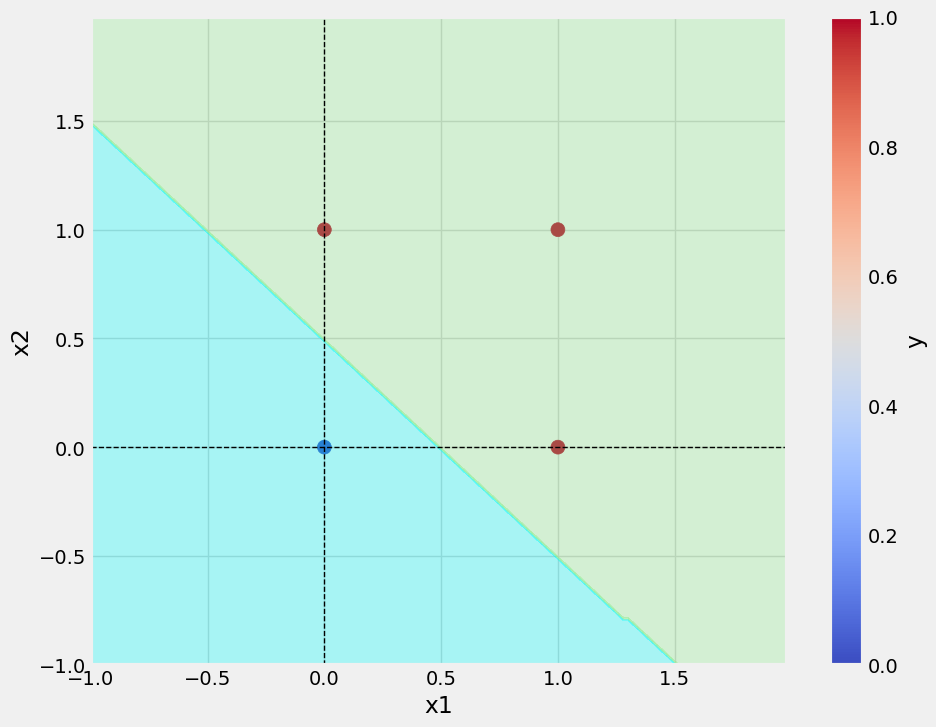

In [42]:

save_plot(df_OR, model_or, filename="or.png")

In the case of the AND function, the decision boundary should be a line that separates the points (0,0), (0,1), and (1,0), which output 0, from the point (1,1), which outputs 1.

The AND function only returns 1 when both inputs are 1. So, if we plot the inputs and outputs on a graph, we can see that the point (1,1) is separated from the other points. The Perceptron model should learn to draw a decision boundary that separates this point from the others.

When we call `save_plot(df_AND, model_and, filename="and.png")`, we are creating a plot that shows the decision boundary and regions for the AND function, as learned by the Perceptron model. The plot will show the input points, colored according to their output class, and the decision boundary that the model has learned.

This visual representation can help us understand how well the model has learned to classify the inputs of the AND function. If the model has learned correctly, the decision boundary should separate the point (1,1) from the other points.


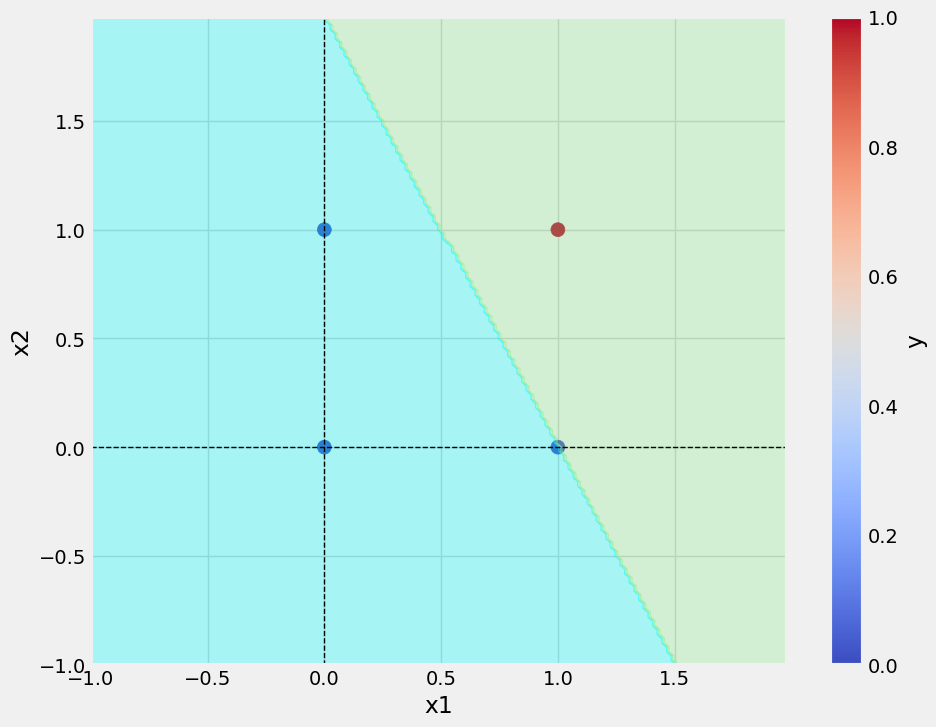

In [47]:
save_plot(df_AND, model_and, filename="and.png")

In the case of the XOR function, the decision boundary cannot be a single straight line, as the XOR function returns 1 for inputs (0,1) and (1,0), and 0 for inputs (0,0) and (1,1). If you plot these points on a graph, with x1 and x2 as the axes, you'll see that you cannot draw a single straight line that separates the points that output 1 from those that output 0.

This is a classic example of data that is not linearly separable. In other words, the XOR function represents a problem that a single Perceptron cannot solve. This is because a Perceptron is a linear classifier, which means it can only learn to separate data with a straight line (in two dimensions), a flat plane (in three dimensions), or a hyperplane (in more than three dimensions).

When we call `save_plot(df_XOR, model_xor, filename="xor.png")`, we are creating a plot that shows the decision boundary and regions for the XOR function, as learned by the Perceptron model. The plot will show the input points, colored according to their output class, and the decision boundary that the model has learned.

However, as we know that a single Perceptron cannot correctly classify the inputs of the XOR function, the decision boundary in the plot will not correctly separate the points that output 1 from those that output 0. This visual representation can help us understand the limitations of the Perceptron model when dealing with data that is not linearly separable.


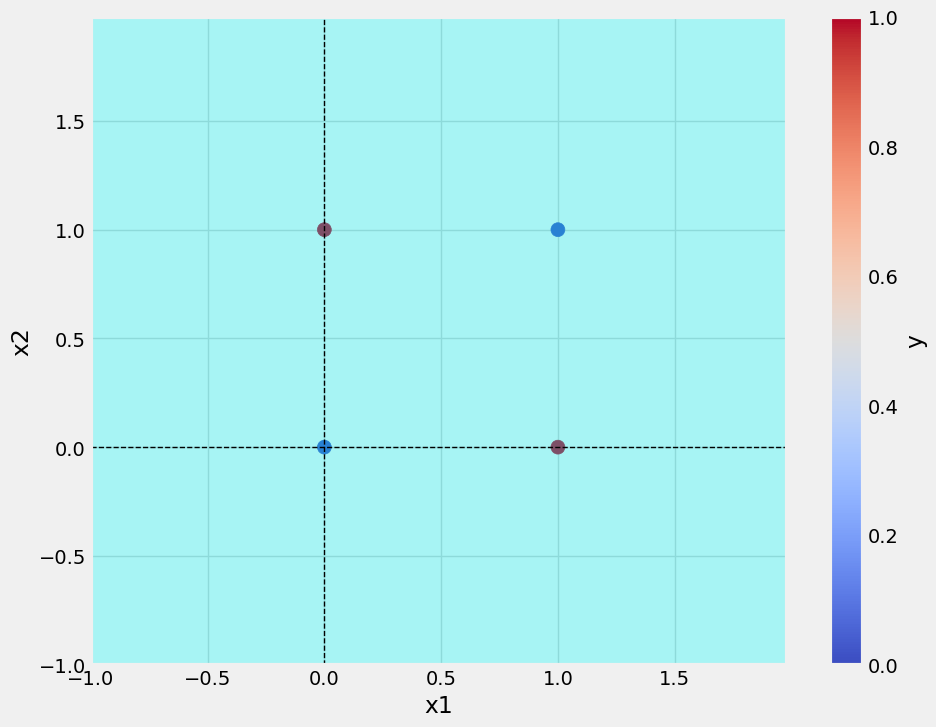

In [44]:
save_plot(df_XOR, model_xor, filename="xor.png")

In conclusion, the Perceptron is a simple yet powerful model for binary classification problems. It's based on a linear function and does not require a lot of computational resources, making it a good choice for problems with linearly separable data.

However, the Perceptron has its limitations. As we've seen with the XOR function, it cannot solve problems where the data is not linearly separable. This is because the Perceptron is a linear classifier and can only learn to separate data with a straight line (in two dimensions), a flat plane (in three dimensions), or a hyperplane (in more than three dimensions).

This limitation of the Perceptron led to the development of more complex models, such as Multilayer Perceptrons (MLPs) and other types of neural networks. These models can learn to classify data that is not linearly separable by using multiple layers of neurons and non-linear activation functions.

Despite its limitations, the Perceptron is a fundamental building block in the field of machine learning and has paved the way for the development of more advanced models. Understanding how it works and its strengths and weaknesses is crucial for anyone studying or working in this field.
